In [28]:
import os
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

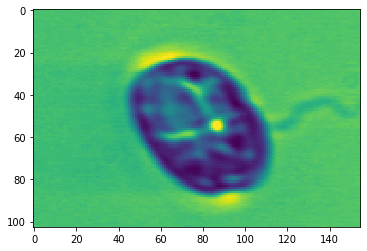

In [29]:
## helper functions

data_folder = "./data"
# to list all files of a directory:
def list_files(dir):
    return os.listdir(dir)

# get all labels
def get_lbls_fnames(years, ignored_classes=[]):
    fnames = []
    labels = []
    for year in years:
        year_path = data_folder+"/"+year
        if os.path.isdir(year_path):
            for class_name in os.listdir(data_path):
                if class_name in ignored_classes:
                    continue
                c_path = data_path + "/"+class_name

                if os.path.isdir(c_path):
                    image_files = [x for x in os.listdir(c_path) if ".png" in x]
                    fnames.extend(image_files)
                    labels.extend([class_name]*len(image_files))
    return fnames, labels

# to show image
def show_landmarks(image):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()

img_names = np.array(list_files('data/2006/Karenia'))
show_landmarks(io.imread(os.path.join('data/2006/Karenia', img_names[0])))
plt.show()

In [30]:
#dataset class
class PlanktonDataset(Dataset):
    
    def __init__(self, ids, labels, root_dir, transform=None):
        self.root_dir = root_dir
        self.file_ids = ids
        self.file_labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.file_ids)
    
    def __getitem__(self, index):
        file_name = self.filds_ids[index]
        year = file_name.split("_")[1]
        label = self.file_labels[index] 
        
        img_name = os.path.join(self.root_dir, year, label, file_name, ".png")
        img = io.imread(img_name)
        sample = {'image': img, 'label': label}
        if self.transform:
            sample = self.transform(sample)
        return sample